In [22]:
import pandas as pd
import numpy as np

In [23]:
test = pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/test.csv', index_col = 'id')
train = pd.read_csv('/kaggle/input/binaryclassificationwithabankchurndataset/train.csv', index_col = 'id')

In [24]:
train_test_data = [train, test] # train va test dataset'larini birlashtirish
sex_mapping = {"Male": 1, "Female": 0}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(sex_mapping)

In [25]:
# delete unnecessary feature from dataset
train.drop('Surname', axis=1, inplace=True)
test.drop('Surname', axis=1, inplace=True)

train.drop('CustomerId', axis=1, inplace=True)
test.drop('CustomerId', axis=1, inplace=True)

In [26]:
train_test_data

[       CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
 id                                                                             
 0            567.0    France       1  33.0     9.0       0.00            2.0   
 1            628.0    France       0  38.0     3.0       0.00            1.0   
 2            635.0    France       0  29.0     3.0       0.00            2.0   
 3            681.0    France       1  28.0     6.0       0.00            2.0   
 4            587.0    France       0  27.0     5.0       0.00            2.0   
 ...            ...       ...     ...   ...     ...        ...            ...   
 14995        581.0    France       1  35.0     1.0       0.00            2.0   
 14996        806.0   Germany       1  42.0     1.0  129120.64            2.0   
 14997        620.0    France       0  29.0     7.0       0.00            2.0   
 14998        622.0   Germany       1  51.0     6.0  106070.89            3.0   
 14999        543.0    Franc

In [27]:
test_cl = pd.get_dummies(test, columns=['Geography']).astype(float)
test_cl

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,
15000,707.0,1.0,21.0,4.0,114513.66,2.0,1.0,0.0,176692.87,0.0,1.0,0.0
15001,678.0,1.0,33.0,5.0,142510.50,1.0,0.0,0.0,52820.13,0.0,1.0,0.0
15002,636.0,1.0,45.0,9.0,0.00,2.0,1.0,1.0,125062.02,0.0,0.0,1.0
15003,697.0,1.0,46.0,8.0,0.00,2.0,1.0,0.0,131647.41,0.0,0.0,1.0
15004,553.0,1.0,31.0,2.0,0.00,2.0,1.0,0.0,58814.41,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,583.0,0.0,46.0,4.0,0.00,2.0,1.0,1.0,175071.29,1.0,0.0,0.0
24996,513.0,1.0,42.0,4.0,148159.71,2.0,1.0,1.0,149740.22,1.0,0.0,0.0
24997,559.0,1.0,52.0,7.0,117561.49,3.0,1.0,0.0,163534.36,0.0,0.0,1.0


In [28]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

In [29]:
train_cl = pd.get_dummies(train, columns=['Geography']).astype(float)
train_cl

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
id,,,,,,,,,,,,,
0,567.0,1.0,33.0,9.0,0.00,2.0,1.0,0.0,156792.89,0.0,1.0,0.0,0.0
1,628.0,0.0,38.0,3.0,0.00,1.0,1.0,1.0,51987.99,1.0,1.0,0.0,0.0
2,635.0,0.0,29.0,3.0,0.00,2.0,1.0,1.0,113079.19,0.0,1.0,0.0,0.0
3,681.0,1.0,28.0,6.0,0.00,2.0,1.0,0.0,14081.64,0.0,1.0,0.0,0.0
4,587.0,0.0,27.0,5.0,0.00,2.0,1.0,0.0,158958.90,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,581.0,1.0,35.0,1.0,0.00,2.0,1.0,0.0,161653.50,0.0,1.0,0.0,0.0
14996,806.0,1.0,42.0,1.0,129120.64,2.0,1.0,1.0,161642.08,0.0,0.0,1.0,0.0
14997,620.0,0.0,29.0,7.0,0.00,2.0,1.0,1.0,161579.85,0.0,1.0,0.0,0.0


In [30]:
train_cl.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,657.856800,0.565200,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467,0.602667,0.178667,0.218667
std,72.678739,0.495747,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859,0.489362,0.383086,0.413356
min,431.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,602.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000,0.000000,0.000000,0.000000
50%,661.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000,1.000000,0.000000,0.000000
75%,707.000000,1.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000,1.000000,0.000000,0.000000
max,850.000000,1.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000,1.000000,1.000000,1.000000


In [31]:
train_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        15000 non-null  float64
 1   Gender             15000 non-null  float64
 2   Age                15000 non-null  float64
 3   Tenure             15000 non-null  float64
 4   Balance            15000 non-null  float64
 5   NumOfProducts      15000 non-null  float64
 6   HasCrCard          15000 non-null  float64
 7   IsActiveMember     15000 non-null  float64
 8   EstimatedSalary    15000 non-null  float64
 9   Exited             15000 non-null  float64
 10  Geography_France   15000 non-null  float64
 11  Geography_Germany  15000 non-null  float64
 12  Geography_Spain    15000 non-null  float64
dtypes: float64(13)
memory usage: 1.6 MB


In [32]:
train_cl.select_dtypes(include=['number']).corrwith(train_cl['Exited'])

CreditScore         -0.052375
Gender              -0.169465
Age                  0.449425
Tenure              -0.032897
Balance              0.160062
NumOfProducts       -0.312812
HasCrCard           -0.010670
IsActiveMember      -0.188748
EstimatedSalary      0.035193
Exited               1.000000
Geography_France    -0.137703
Geography_Germany    0.242651
Geography_Spain     -0.061859
dtype: float64

In [33]:
avoid=train_cl['Exited'].value_counts()/len(train_cl)*100
avoid

Exited
0.0    80.153333
1.0    19.846667
Name: count, dtype: float64

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Taxminan 20% mijoz foydalanishni to'xtatmoqda

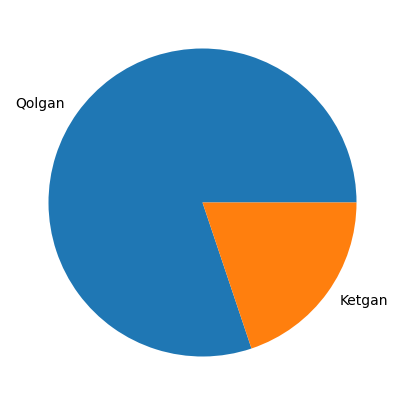

In [35]:
plt.figure(figsize=(5,5))
plt.pie(x=avoid, labels=['Qolgan','Ketgan'])
plt.show()

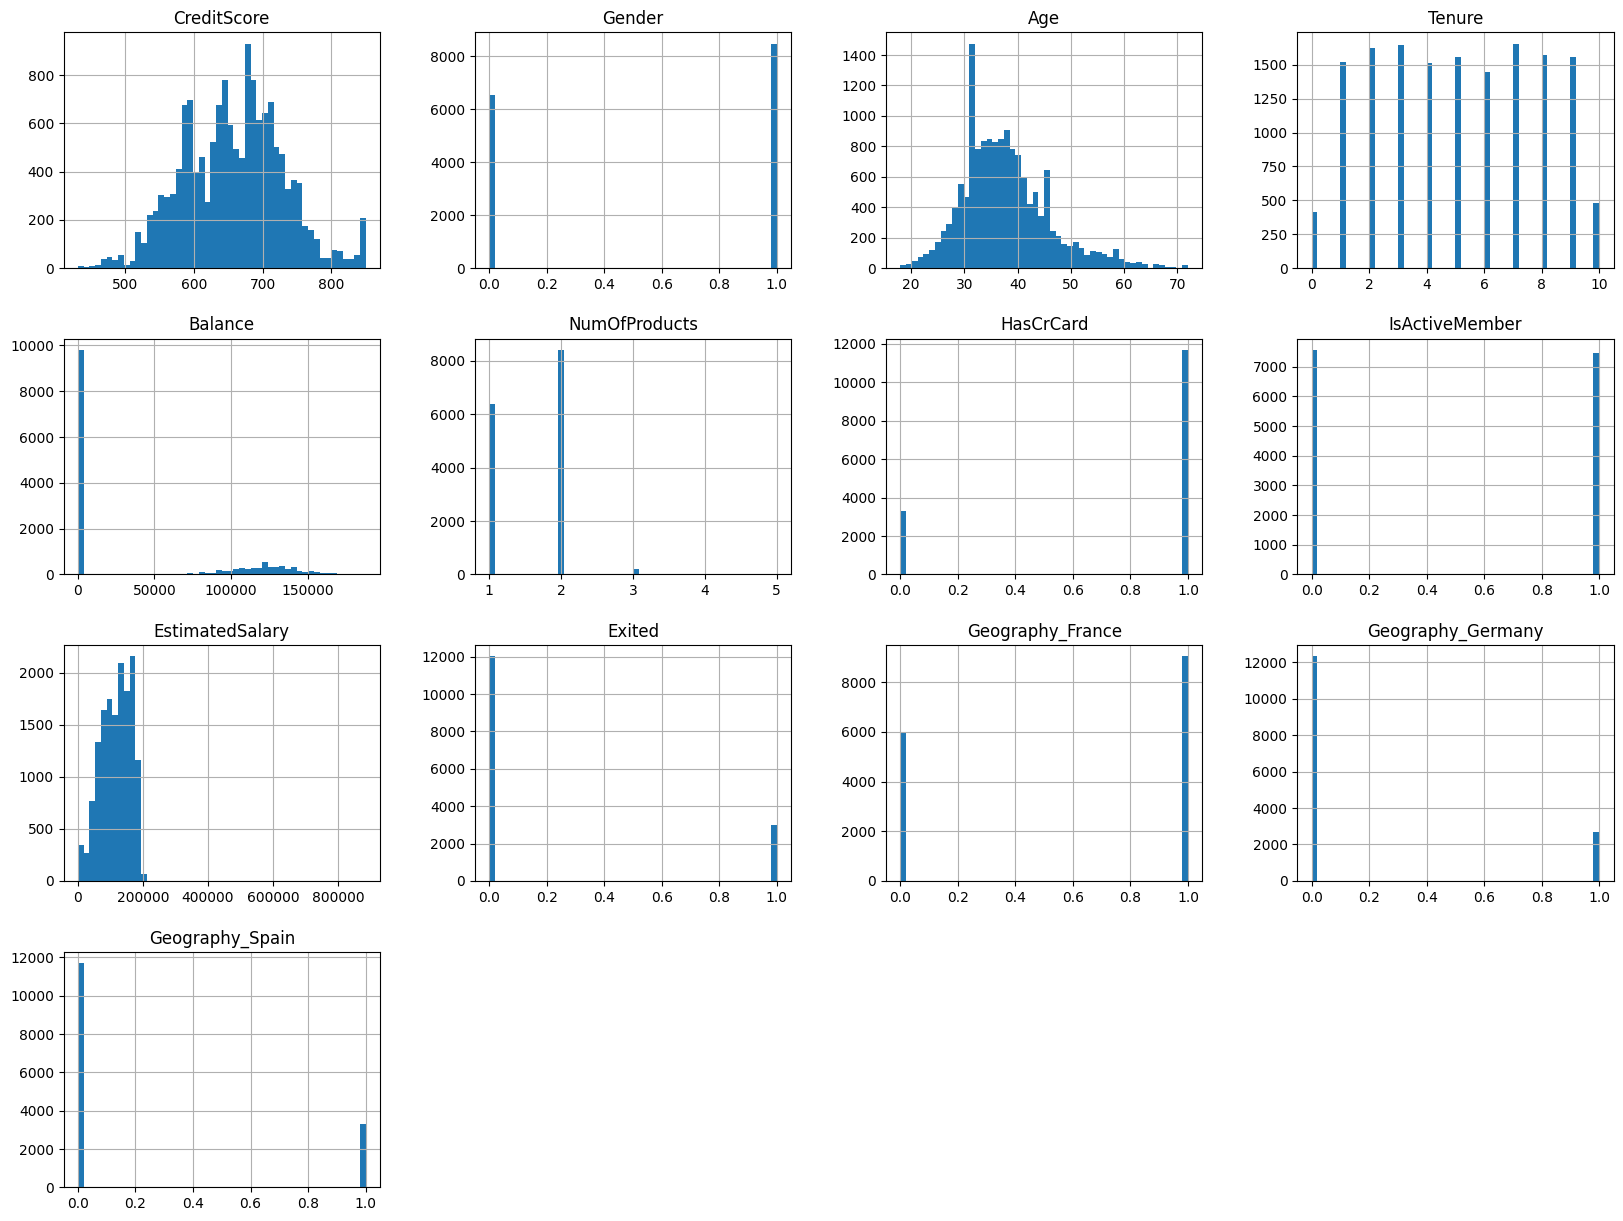

In [36]:
%matplotlib inline
train_cl.hist(bins=50, figsize=(20,15))
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

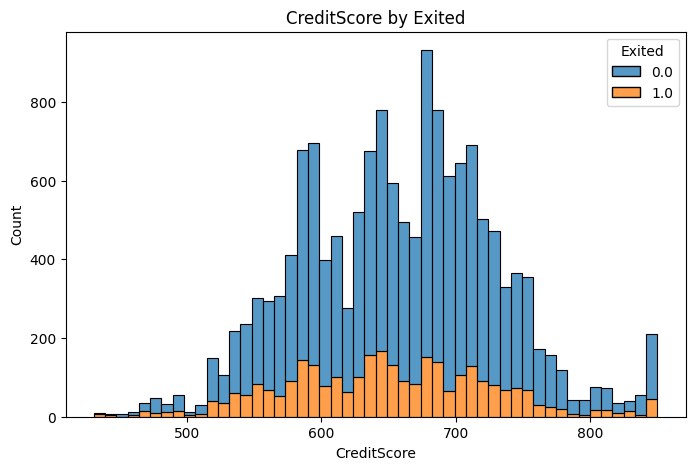

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

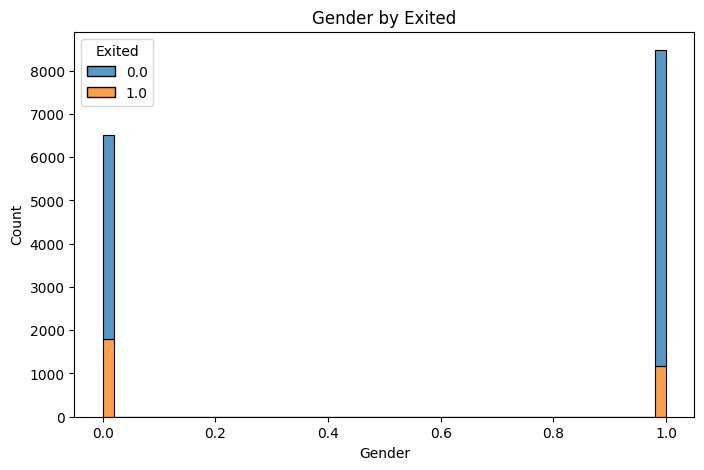

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

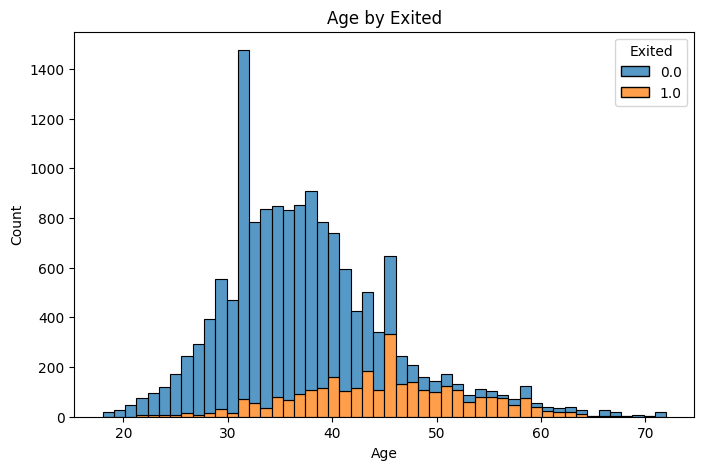

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

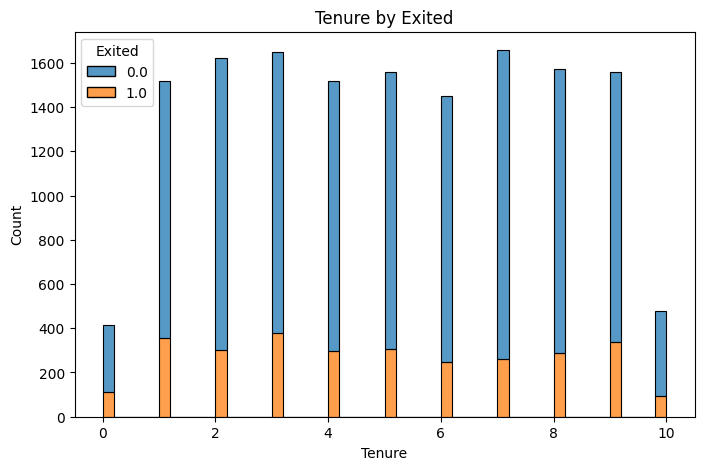

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

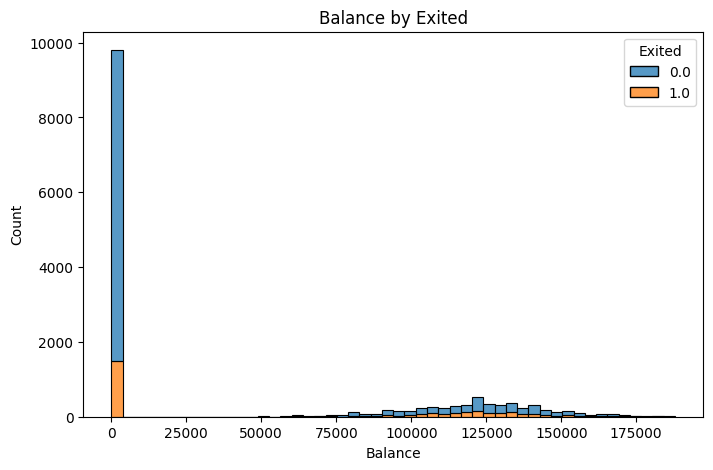

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

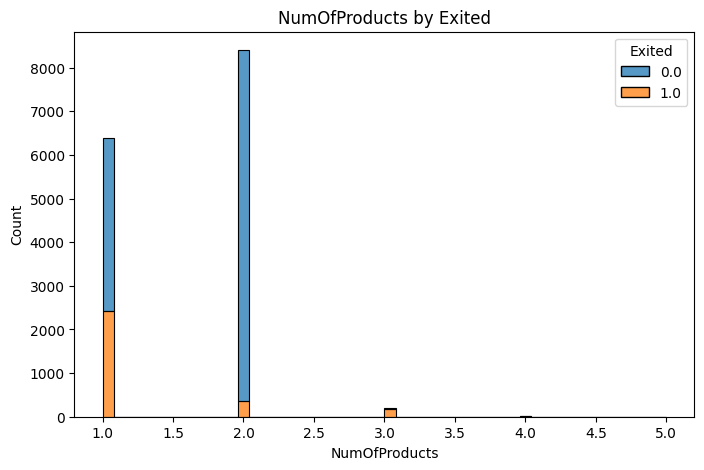

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

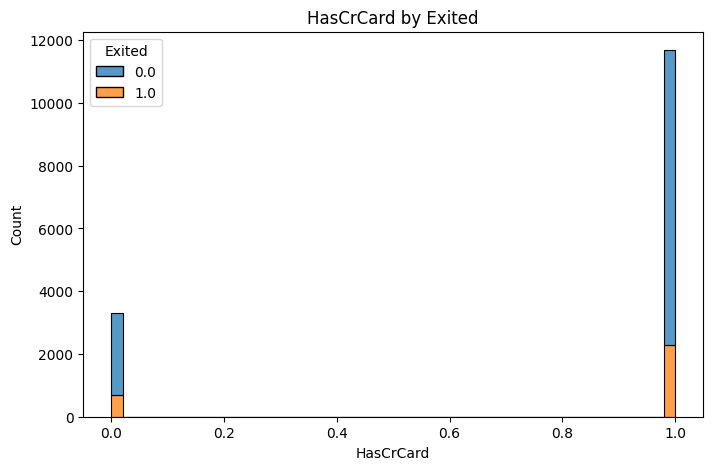

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

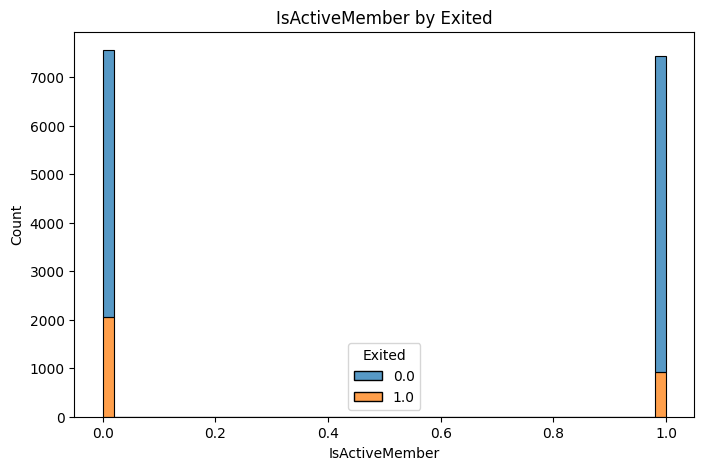

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

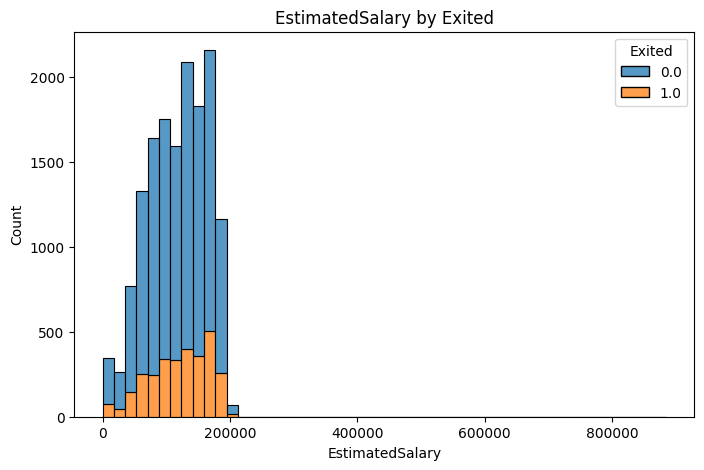

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

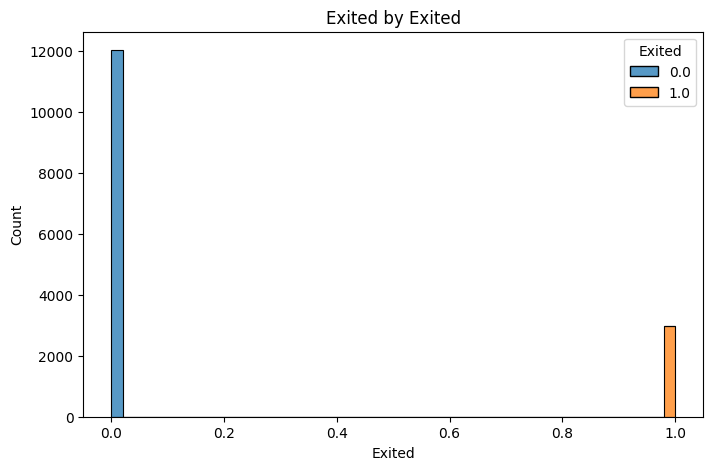

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

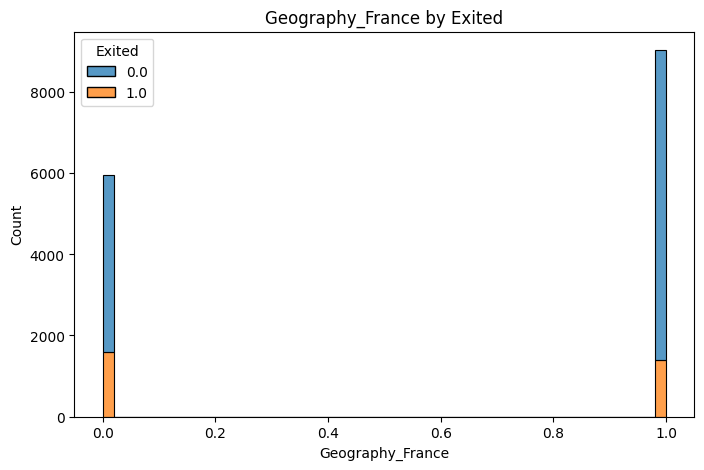

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

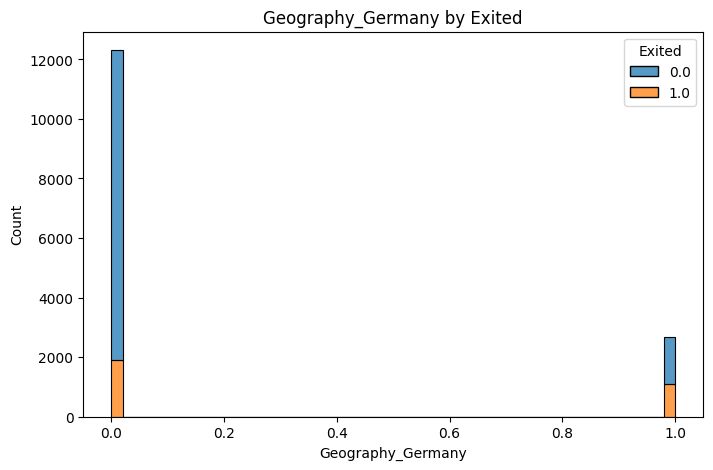

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

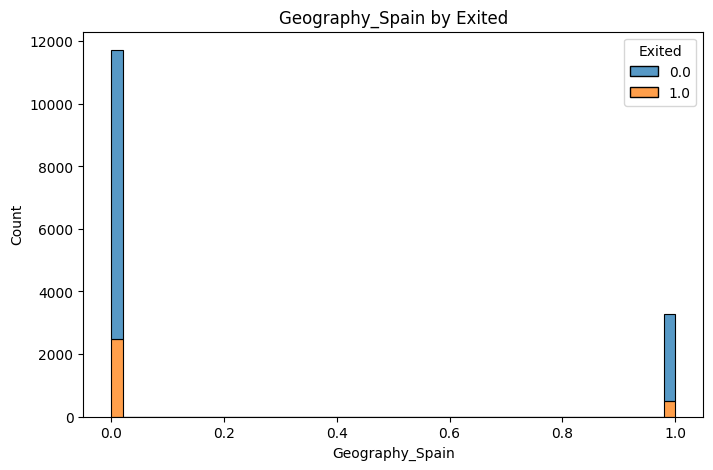

In [37]:
cols = train_cl.columns
for col in cols:
    plt.figure(figsize=(8,5))
    sns.histplot(data=train_cl, x=col, hue='Exited', bins=50, multiple='stack')
    plt.title(f'{col} by Exited')
    plt.show()

In [38]:
from sklearn.cluster import KMeans
X_train_fe = train_cl[['Age', 'NumOfProducts']]
X_test_fe  = test_cl[['Age', 'NumOfProducts']]

kmeans = KMeans(n_clusters=3, random_state=42)

# Fit clustering ONLY on train
train_cl['Cluster'] = kmeans.fit_predict(X_train_fe)

# Predict for test
test_cl['Cluster'] = kmeans.predict(X_test_fe)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

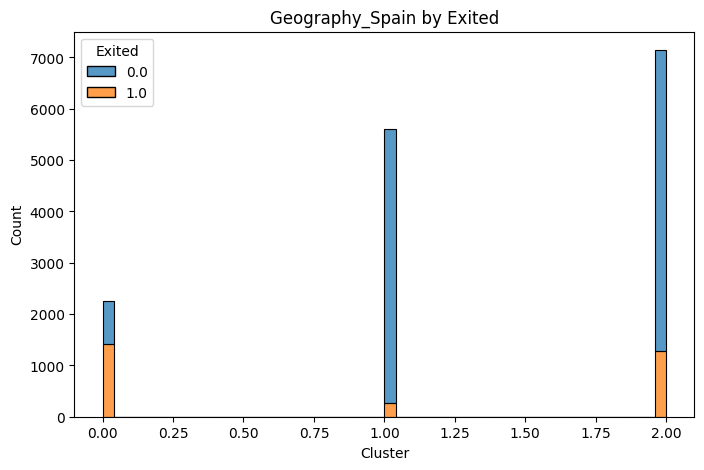

In [39]:
    plt.figure(figsize=(8,5))
    sns.histplot(data=train_cl, x='Cluster', hue='Exited', bins=50, multiple='stack')
    plt.title(f'{col} by Exited')
    plt.show()

Chizmalarga qaraganda hamma qatlamlarda deyarli bir hil darajada mijozlar yo'qotliyapti

In [65]:
target = train_cl['Exited']
train_data = train_cl.drop('Exited', axis=1)
target.shape,  train_data.shape

((15000,), (15000, 13))

In [67]:
test_data = test_cl

In [42]:
# Yuklash Classifier Modullarini

from sklearn.ensemble import RandomForestClassifier

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [56]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.89866667 0.894      0.882      0.884      0.882      0.87933333
 0.89466667 0.89       0.876      0.89      ]


In [57]:
# Random Forest score
round(np.mean(score)*100, 2)

88.71

In [69]:
clf.fit(train_data, target)


prediction = clf.predict(test_data)

In [73]:
submission = pd.DataFrame({
        'id': test_data.index,
        "Exited": prediction
    })

submission.to_csv('submission.csv', index=False)

In [74]:
submission = pd.read_csv('submission.csv')
submission.head(10)

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,1.0
3,15003,0.0
4,15004,0.0
5,15005,0.0
6,15006,0.0
7,15007,1.0
8,15008,0.0
9,15009,0.0
